
****

***
# <font color=green size=10>Recomendador de Música Spotify com Clusterização</font>
***

****

Análise por meio da clusterização das faixas musicais provenientes da API do Spotify. Com o emprego de clusterização, o algoritmo é capacitado para agrupar músicas com características semelhantes. A partir desses agrupamentos, o algoritmo tem a capacidade de fornecer recomendações de um conjunto de músicas similares com base em uma única faixa apresentada como referência.

### Dicionário de  Atributos de uma Faixa Musical



- **Acousticness/Acústica:**
  - Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

- **Danceability/Dançabilidade:**
  - Variável numérica, descreve o quão adequada uma faixa é para dançar com base em elementos musicais. Varia de 0,0 (menos dançável) a 1,0 (mais dançável).

- **Duration_ms:**
  - Variável numérica, a duração da trilha em milissegundos.

- **Duration_min:**
  - Variável numérica, a duração da faixa em minutos.

- **Energy/Energia:**
  - Variável numérica, medida de intensidade e atividade de 0,0 a 1,0.

- **Explicit/Explícito:**
  - Variável categórica, indica se a faixa tem letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

- **Id:**
  - O ID do Spotify para a faixa.

- **Instrumentalness/Instrumentalidade:**
  - Variável numérica, prevê se uma faixa contém vocais. Varia de 0 a 1, quanto mais próximo de 1,0, maior a probabilidade de ser instrumental.

- **Key/Chave:**
  - Variável numérica, a chave geral estimada da faixa usando a notação padrão de Pitch Class.

- **Liveness/Ao vivo:**
  - Variável numérica, detecta a presença de um público na gravação. Valores mais altos representam maior probabilidade de ser uma apresentação ao vivo.

- **Loudness/Volume em dB:**
  - Variável numérica, volume geral da faixa em decibéis.

- **Mode/Modo:**
  - Variável numérica, indica a modalidade (maior ou menor) de uma faixa.

- **Popularity/Popularidade:**
  - Variável numérica, a popularidade de uma faixa entre 0 e 100, calculada com base no número total de execuções.

- **Speechiness/Fala:**
  - Variável numérica, detecta a presença de palavras faladas em uma faixa.

- **Tempo:**
  - Variável numérica, tempo estimado geral de uma faixa em batidas por minuto (BPM).

- **Valence/Valência:**
  - Variável numérica, medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa.

- **Year/Ano:**
  - Ano em que a música foi lançada.


#Importação das Bibliotecas e dos Dados

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import euclidean_distances
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
dados = pd.read_csv('/content/Dados_totais.csv')
dados_generos = pd.read_csv('/content/data_by_genres.csv')
dados_anos = pd.read_csv('/content/data_by_year.csv')

In [ ]:
dados.head()

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy  explicit                      id  instrumentalness  key  liveness  \
0   0.661         0  3AJwUDP919kvQ9QcozQPxg          0.000121   11    0.2340   
1   0.806         1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4    0.0771   
2   0.864         0  60a0Rd6pjrkxjPbaKzXjfq          0.000000    3    0.2090   
3   0.865         0  6ZOBP3NvffbU4SZcrnt1k6          0.000011   11    0.1680   
4   0.661         1  3yfqSUWxFvZELEM4PmlwIR          0.000000    5    0.0454   

   loudness  mode                 name  popularity  speechiness    tempo  \
0    -7.227     1               Yellow          84       0.0281  173.372   
1    -5.946     0          Ms. Jackson          80       0.2690   94.948   
2    -5.870     0           In the End          84       0.0584  105.143   
3    -5.708     0           Kryptonite          78       0.0286   99.009   
4    -4.244     0  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

In [ ]:
dados['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
dados.shape

(20311, 19)

In [ ]:
dados = dados.drop(['explicit','key','mode'],axis = 1)
dados.head()

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy                      id  instrumentalness  liveness  loudness  \
0   0.661  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1   0.806  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2   0.864  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   
3   0.865  6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708   
4   0.661  3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244   

                  name  popularity  speechiness    tempo  \
0               Yellow          84       0.0281  173.372   
1          Ms. Jackson          80       0.2690   94.948   
2           In the End          84       0.0584  105.143   
3           Kryptonite          78       0.0286   99.009   
4  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

In [ ]:
dados.shape

(20311, 16)

In [ ]:
dados.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

#Exploração dos Dados

In [ ]:
#dados generos

In [ ]:
dados_generos.head()

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
3     1                      []      0.651417      0.529093  2.328809e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7  
3  0.513604   20.859882    7  
4  0.448249   45.820071    7

In [ ]:
dados_generos = dados_generos.drop(['key','mode'],axis = 1)
dados_generos.head()

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.979333      0.162883  1.602977e+05  0.071317   
1                   432hz      0.494780      0.299333  1.048887e+06  0.450678   
2                   8-bit      0.762000      0.712000  1.151770e+05  0.818000   
3                      []      0.651417      0.529093  2.328809e+05  0.419146   
4              a cappella      0.676557      0.538961  1.906285e+05  0.316434   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.606834  0.361600 -31.514333     0.040567   75.336500  0.103783   
1          0.477762  0.131000 -16.854000     0.076817  120.285667  0.221750   
2          0.876000  0.126000  -9.180000     0.047000  133.444000  0.975000   
3          0.205309  0.218696 -12.288965     0.107872  112.857352  0.513604   
4          0.003003  0.172254 -12.479387     0.082851  112.110362  0.448249   

   popularity  
0   27.833333  
1   52.500000  
2   48.000000  
3   20.859882  
4   45.820071

In [ ]:
dados_generos.isna().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [ ]:
#dados anos

dados_anos.head()

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   
2     1  1923      0.957247      0.577341  177942.362162  0.262406   
3     1  1924      0.940200      0.549894  191046.707627  0.344347   
4     1  1925      0.962607      0.573863  184986.924460  0.278594   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878  0.205710 -17.048667     0.073662  101.531493  0.379327   
1          0.434195  0.240720 -19.275282     0.116655  100.884521  0.535549   
2          0.371733  0.227462 -14.129211     0.093949  114.010730  0.625492   
3          0.581701  0.235219 -14.231343     0.092089  120.689572  0.663725   
4          0.418297  0.237668 -14.146414     0.111918  115.521921  0.621929   

   popularity  key  
0    0.653333    2  
1    0.140845   10  
2    5.389189    0  
3    0.661017   10  
4    2.604317    5

In [ ]:
dados_anos['year'].unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [ ]:
dados_anos = dados_anos[dados_anos['year'] >= 2000]
dados_anos['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
dados_anos = dados_anos.drop(['key','mode'],axis = 1)
dados_anos.head()

year  acousticness  danceability    duration_ms    energy  \
79  2000      0.289323      0.590918  242724.642638  0.625413   
80  2001      0.286842      0.583318  240307.796010  0.626986   
81  2002      0.282624      0.576160  239503.283000  0.641270   
82  2003      0.256471      0.575763  244670.575230  0.660165   
83  2004      0.280559      0.567680  237378.708037  0.648868   

    instrumentalness  liveness  loudness  speechiness       tempo   valence  \
79          0.101168  0.197686 -8.247766     0.089205  118.999323  0.559475   
80          0.107214  0.187026 -8.305095     0.089182  117.765399  0.541479   
81          0.088048  0.193911 -7.686640     0.084308  119.239738  0.542397   
82          0.083049  0.196976 -7.485545     0.093926  120.914622  0.530504   
83          0.077934  0.202199 -7.601655     0.094239  121.290346  0.524489   

    popularity  
79   46.684049  
80   48.750125  
81   48.655500  
82   48.626407  
83   49.273143

In [ ]:
dados_anos.reset_index(inplace = True)

In [ ]:
dados_anos.isna().sum()

index               0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [ ]:
fig = px.line(dados_anos, x ='year', y ='loudness', markers = True,
              title = 'Variação de Loudness com os anos')
fig.show()

In [ ]:
fig = go.Figure()

In [ ]:
lista = ['acousticness','valence','danceability','energy','instrumentalness',
         'liveness','speechiness']

for var in lista:
  fig.add_trace(go.Scatter(x = dados_anos['year'], y = dados_anos[var], name = var.capitalize()))

fig.show()

In [ ]:
fig = px.imshow(dados.corr(), text_auto = True)
fig.show()

<ipython-input-643-3130499cc5bf>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



#Clusterização por Gênero

In [ ]:
dados_generos.head()

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.979333      0.162883  1.602977e+05  0.071317   
1                   432hz      0.494780      0.299333  1.048887e+06  0.450678   
2                   8-bit      0.762000      0.712000  1.151770e+05  0.818000   
3                      []      0.651417      0.529093  2.328809e+05  0.419146   
4              a cappella      0.676557      0.538961  1.906285e+05  0.316434   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.606834  0.361600 -31.514333     0.040567   75.336500  0.103783   
1          0.477762  0.131000 -16.854000     0.076817  120.285667  0.221750   
2          0.876000  0.126000  -9.180000     0.047000  133.444000  0.975000   
3          0.205309  0.218696 -12.288965     0.107872  112.857352  0.513604   
4          0.003003  0.172254 -12.479387     0.082851  112.110362  0.448249   

   popularity  
0   27.833333  
1   52.500000  
2   48.000000  
3   20.859882  
4   45.820071

In [ ]:
dados_generos['genres'].value_counts().sum()

2973

In [ ]:
dados_generos.shape

(2973, 12)

In [ ]:
dados_generos_2 = dados_generos.drop('genres',axis = 1)

In [ ]:
seed = 110
np.random.seed(seed)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2,
                        random_state=seed))])

In [ ]:
genre_pca = pca_pipeline.fit_transform(dados_generos_2)
projection = pd.DataFrame(columns=['x', 'y'], data= genre_pca)

In [ ]:
projection.head()

x         y
0  5.910268 -0.011146
1  2.787093  4.498483
2 -0.757538 -1.258495
3  1.020521 -0.931690
4  0.753911 -0.999861

In [ ]:
projection.shape

(2973, 2)

#K-Means

In [ ]:
kmeans_pca = KMeans(n_clusters = 5, verbose = True, random_state = seed)

In [ ]:
kmeans_pca.fit(projection)

dados_generos['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 4479.832209138858.
Iteration 1, inertia 3909.5004880921915.
Iteration 2, inertia 3696.0525664317274.
Iteration 3, inertia 3618.9157449315644.
Iteration 4, inertia 3598.164121264788.
Iteration 5, inertia 3589.904988085292.
Iteration 6, inertia 3585.0274926023894.
Iteration 7, inertia 3582.2685812065038.
Iteration 8, inertia 3578.601882372295.
Iteration 9, inertia 3575.5840853286563.
Iteration 10, inertia 3574.2068117350755.
Iteration 11, inertia 3573.5250261948336.
Iteration 12, inertia 3572.676336091311.
Iteration 13, inertia 3571.736357498502.
Iteration 14, inertia 3570.39315091338.
Iteration 15, inertia 3568.7500817217046.
Iteration 16, inertia 3567.265242838723.
Iteration 17, inertia 3566.1415292055262.
Iteration 18, inertia 3565.2833003343344.
Iteration 19, inertia 3564.416195620052.
Iteration 20, inertia 3563.3507073277506.
Iteration 21, inertia 3562.1088416903403.
Iteration 22, inertia 3560.8567117152625.
Iteration 23, inertia 3560.100

In [ ]:
projection

x         y  cluster_pca
0     5.910268 -0.011146            1
1     2.787093  4.498483            1
2    -0.757538 -1.258495            0
3     1.020521 -0.931690            3
4     0.753911 -0.999861            3
...        ...       ...          ...
2968 -0.475136 -0.017126            2
2969 -3.026756 -1.304983            0
2970 -0.832511 -1.089726            0
2971  1.774790 -3.695233            3
2972 -1.028069 -1.390709            0

[2973 rows x 3 columns]

In [ ]:
projection['genres'] = dados_generos['genres']

In [ ]:
fig = px.scatter(projection, x ='x', y = 'y', color = 'cluster_pca',
                 hover_data =['x','y','genres'])
fig.show()

In [ ]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.49270669947266477

In [ ]:
pca_pipeline[1].explained_variance_.sum()

5.4215973058057045

#Clusterizaçao por Musica

In [ ]:
dados.head()

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy                      id  instrumentalness  liveness  loudness  \
0   0.661  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1   0.806  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2   0.864  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   
3   0.865  6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708   
4   0.661  3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244   

                  name  popularity  speechiness    tempo  \
0               Yellow          84       0.0281  173.372   
1          Ms. Jackson          80       0.2690   94.948   
2           In the End          84       0.0584  105.143   
3           Kryptonite          78       0.0286   99.009   
4  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

In [ ]:
dados['artists'].value_counts()

Drake                   170
Taylor Swift            156
Eminem                  147
Kanye West              136
BTS                     122
                       ... 
Of Monsters and Men       7
The Living Tombstone      7
Clean Bandit              7
Nelly Furtado             6
Empire of the Sun         6
Name: artists, Length: 875, dtype: int64

In [ ]:
dados['artists_song'].value_counts()

Coldplay - Yellow                                                   1
Juice WRLD - Intro                                                  1
Carrie Underwood - The Champion - Bonus Track                       1
YoungBoy Never Broke Again - Cross Me (feat. Lil Baby and Plies)    1
Twenty One Pilots - Morph                                           1
                                                                   ..
Taylor Swift - Come Back...Be Here                                  1
Banda El Recodo - Me Gusta Todo De Ti                               1
Michael Bublé - The Christmas Song                                  1
Glee Cast - Smooth Criminal (Glee Cast Version) (feat. 2CELLOS)     1
Eminem - Darkness                                                   1
Name: artists_song, Length: 20311, dtype: int64

Como cada artista tem uma quantidade de música associada a si, uma forma de coletarmos se aquela música pertence ao artista ou não é através de dummies - por exemplo se aquela música for da artista Taylor Swift, estará um 1, caso não, 0. No caso, usaremos o OneHotEncoder, que já entra em uma pipeline de machine learning.

In [ ]:
ohe = OneHotEncoder(dtype = int)
colunas_ohe = ohe.fit_transform(dados[['artists']]).toarray()

dados2 = dados.drop('artists', axis = 1)

dados_musicas_dummies = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns = ohe.get_feature_names_out(['artists']))], axis = 1)
dados_musicas_dummies

valence  year  acousticness  danceability  duration_ms  energy  \
0        0.285  2000       0.00239         0.429       266773   0.661   
1        0.613  2000       0.14300         0.843       270507   0.806   
2        0.400  2000       0.00958         0.556       216880   0.864   
3        0.543  2000       0.00664         0.545       233933   0.865   
4        0.760  2000       0.03020         0.949       284200   0.661   
...        ...   ...           ...           ...          ...     ...   
20306    0.187  2020       0.57400         0.445       176250   0.330   
20307    0.240  2020       0.81500         0.467       179188   0.429   
20308    0.466  2020       0.31000         0.562       253613   0.686   
20309    0.522  2020       0.20400         0.598       230600   0.472   
20310    0.195  2020       0.00998         0.671       337147   0.623   

                           id  instrumentalness  liveness  loudness  ...  \
0      3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227  ...   
1      0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  ...   
2      60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870  ...   
3      6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708  ...   
4      3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244  ...   
...                       ...               ...       ...       ...  ...   
20306  0PUkanqCGTb6qseXPKOw1F          0.000000    0.1020    -8.121  ...   
20307  6Iw6fQVKZi0fWtEQBrTFcP          0.000052    0.1770    -8.689  ...   
20308  308prODCCD0O660tIktbUi          0.022500    0.1250    -8.480  ...   
20309  2f8y4CuG57UJEmkG3ujd0D          0.000015    0.1080   -10.991  ...   
20310  5SiZJoLXp3WOl3J4C8IK0d          0.000008    0.6430    -7.161  ...   

      artists_Zara Larsson  artists_Zedd  artists_alt-J  artists_blackbear  \
0                        0             0              0                  0   
1                        0             0              0                  0   
2                        0             0              0                  0   
3                        0             0              0                  0   
4                        0             0              0                  0   
...                    ...           ...            ...                ...   
20306                    0             0              0                  0   
20307                    0             0              0                  0   
20308                    0             0              0                  0   
20309                    0             0              0                  0   
20310                    0             0              0                  0   

      artists_blink-182  artists_deadmau5  artists_for KING & COUNTRY  \
0                     0                 0                           0   
1                     0                 0                           0   
2                     0                 0                           0   
3                     0                 0                           0   
4                     0                 0                           0   
...                 ...               ...                         ...   
20306                 0                 0                           0   
20307                 0                 0                           0   
20308                 0                 0                           0   
20309                 0                 0                           0   
20310                 0                 0                           0   

       artists_fun.  artists_girl in red  artists_iann dior  
0                 0                    0                  0  
1                 0                    0                  0  
2                 0                    0                  0  
3                 0                    0                  0  
4                 0                    0                  0  
...             ...            

In [ ]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=seed))])

music_embedding_pca = pca_pipeline.fit_transform(dados_musicas_dummies.drop(['id','name','artists_song'], axis = 1))
projection_m = pd.DataFrame(data=music_embedding_pca)


In [ ]:
pca_pipeline[1].n_components_

612

##K-Means

In [ ]:
kmeans_pca_pipeline = KMeans(n_clusters = 50, verbose = False, random_state = seed)

kmeans_pca_pipeline.fit(projection_m)

dados['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
projection_m['artist'] = dados['artists']
projection_m['song'] = dados['artists_song']

In [ ]:
projection_m

0         1         2         3         4         5         6  \
0      0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1     -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2     -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3     -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4     -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   
...         ...       ...       ...       ...       ...       ...       ...   
20306  1.346699 -2.775889  0.986755 -1.704967  0.103935 -0.726582  0.253808   
20307  1.269387 -2.444619  0.971408 -0.115303 -0.719597 -1.823579 -0.545186   
20308  0.781916 -1.164865  0.705256 -0.947160  1.145828 -0.472667 -0.356604   
20309  0.002454 -3.056407 -0.272934  1.436355 -0.604453  0.251492 -1.361710   
20310 -0.957008 -1.208016  1.103144  4.128170  1.026126  0.085505  1.588383   

              7         8         9  ...       605       606       607  \
0     -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027   
1      0.821698 -1.716897  0.252498  ... -0.031986  0.029708 -0.016322   
2      1.839192 -1.562236  1.410677  ...  0.017097  0.017361 -0.010979   
3      1.135529 -1.343893  1.020964  ...  0.089337  0.164777 -0.064148   
4      0.479412 -2.125376  0.389565  ... -0.011937 -0.004081 -0.017478   
...         ...       ...       ...  ...       ...       ...       ...   
20306  0.520234 -0.064513  0.204971  ... -0.235355 -0.054256  0.016922   
20307 -1.475719 -0.338390  0.272129  ... -0.183026  0.074605  0.005622   
20308  0.972512  0.900317 -0.674016  ... -0.033420 -0.157564  0.213849   
20309 -0.633245  0.280076  0.521145  ... -0.784640  0.080684  0.038379   
20310  0.567041 -1.026283  0.266124  ... -0.012069 -0.003818 -0.017675   

            608           609           610           611  cluster_pca  \
0     -0.032617  2.241192e-11  1.202033e-13  3.177821e-12           45   
1     -0.030234 -2.395758e-12  2.291641e-13 -1.187264e-12           36   
2     -0.012781  4.273933e-12 -6.407207e-13 -1.958694e-13           36   
3     -0.040911  5.152080e-11 -7.249490e-13  1.084807e-11           17   
4     -0.010033  2.254040e-12  1.683896e-13  8.389616e-13           36   
...         ...           ...           ...           ...          ...   
20306 -0.125947  4.217717e-11 -4.175589e-13  5.457610e-11           32   
20307  0.000054  4.323403e-11  1.154738e-11  9.481307e-12           32   
20308 -0.065180 -2.580928e-11  9.953739e-12  4.430351e-11           32   
20309  0.108493  5.473520e-11  1.333316e-11  1.185832e-11           32   
20310 -0.010372  2.372825e-12  1.582875e-13  8.373194e-13           32   

              artist                                song  
0           Coldplay                   Coldplay - Yellow  
1            OutKast               OutKast - Ms. Jackson  
2        Linkin Park            Linkin Park - In the End  
3       3 Doors Down           3 Doors Down - Kryptonite  
4             Eminem        Eminem - The Real Slim Shady  
...              ...                                 ...  
20306          Bazzi      Bazzi - I Don't Think I'm Okay  
20307  Bryson Tiller  Bryson Tiller - Timeless Interlude  
20308    Fleet Foxes              Fleet Foxes - Sunblind  
20309          Gunna      Gunna - NASTY GIRL / ON CAMERA  
20310         Eminem                   Eminem - Darkness  

[20311 rows x 615 columns]

##Analise do Cluster

In [ ]:
fig = px.scatter(projection_m, x =0 , y=1 , color = 'cluster_pca', hover_data = [0,1,'song'])
fig.show()

In [ ]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.7000008463187031

In [ ]:
pca_pipeline[1].explained_variance_.sum()

620.9313218688688

#Recomendação

In [ ]:
nome_musica = 'Imagine Dragons - Demons'
filtro = projection_m['song'] ==  nome_musica

In [ ]:
cluster = list(projection_m[filtro]['cluster_pca'])
cluster

[32]

In [ ]:
musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster[0]][[0, 1, 'song']]
x_musica = list(projection_m[filtro][0])[0]
y_musica = list(projection_m[filtro][1])[0]


 Depois disso, calcula-se a distância entre os valores de X e Y da música, e os valores de X e Y das músicas que estão sendo recomendadas com a distância euclidiana

In [ ]:
distancias = euclidean_distances(musicas_recomendadas[[0,1]], [[x_musica,y_musica]])
musicas_recomendadas['id'] = dados['id']
musicas_recomendadas['distancias'] = distancias

Agora, coloca-se as músicas das mais recomendadas as menos com base na distância entre os pontos do cluster e depois, mostra-se o top 10

In [ ]:
recomendada  = musicas_recomendadas.sort_values('distancias')
recomendada.head(10)

0         1                                             song  \
1681  -0.631556 -0.829362                         Imagine Dragons - Demons   
4842  -0.594939 -0.807189                    Twenty One Pilots - The Judge   
7318  -0.614143 -0.790145                    Brett Eldredge - Love Someone   
9122  -0.677711 -0.836700                Disclosure - Help Me Lose My Mind   
6906  -0.600588 -0.791440                           Pentatonix - Daft Punk   
7192  -0.579382 -0.846490                  Morgan Wallen - American Nights   
889   -0.647311 -0.885537    E-40 - U and Dat (feat. T. Pain & Kandi Girl)   
9288  -0.689173 -0.818503  Trey Songz - Touchin, Lovin (feat. Nicki Minaj)   
12919 -0.616247 -0.767865              Machine Gun Kelly - End Of The Road   
16202 -0.635320 -0.763205         Banda MS de Sergio Lizárraga - Increíble   

                           id  distancias  
1681   3LlAyCYU26dvFZBDUIMb7a    0.000000  
4842   1lguQJjlNrIOoOylYVZN3M    0.042807  
7318   43CFDpciGFDm226POTLEXU    0.042910  
9122   4FjT3dqUW2Uq0R3pMz5V7C    0.046735  
6906   6ukvsBzq4d1vBsAUmz7ZVt    0.048961  
7192   6B4LAyly39cv8Cat9nHObl    0.054914  
889    7g7M96UGiA7OR79H86gV4m    0.058342  
9288   4bkhs6spQvVnVJAlXuKR6a    0.058632  
12919  1lHyxaX6V9ewCD1d0tUvG7    0.063374  
16202  240IA16ruWe9xOjPy16lJy    0.066265

In [ ]:
!pip install spotipy

In [ ]:
scope = "user-library-read playlist-modify-private"
OAuth = SpotifyOAuth(scope = scope,
                     redirect_uri= 'http://localhost:5000/callback',
                     client_id = '83c16d4eaa914b8588b6528f38309a50',
                     client_secret = 'c3be07fd3865447b999d76231b7d62bf')


In [ ]:
client_credentials_manager = SpotifyClientCredentials( client_id = '83c16d4eaa914b8588b6528f38309a50',
                                                      client_secret = 'c3be07fd3865447b999d76231b7d62bf')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

<font color=red size=2>O CLIENT ID E CLIENT SECRET QUE FORAM UTILIZADOS DURANTE ESSE PROJETO JÁ FORAM RESETADOS PARA A SEGURANÇA DO USUÁRIO, POR ISSO CASO VOCÊ QUEIRA REPLICAR O CÓDIGO, POR FAVOR, UTILIZE OUTRO ID, JÁ QUE ESSE TEM O RISCO DE NÃO FUNCIONAR</font>


###Testando a API

In [ ]:
filtro = dados['artists_song'] == nome_musica
id = dados[filtro]['id'].iloc[0]
id

'3LlAyCYU26dvFZBDUIMb7a'

In [ ]:
track = sp.track(id)
url = track['album']['images'][1]['url']
name = track['name']

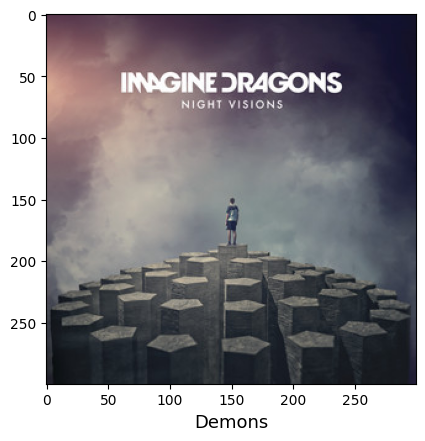

In [ ]:
image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 13)
plt.show()

#API Recomendador de Músicas

##Buscando os dados

In [ ]:
def recommend_id(playlist_id):
  url = []
  name = []
  artist = []
  for i in playlist_id:
    track = sp.track(i)
    url.append(track['album']['images'][1]['url'])
    name.append(track['name'])
    artist.append(track['album']['artists'][0]['name'])
  return name, artist, url

In [ ]:
top_10 = recomendada.head(10)
recommend_id(top_10['id'])

(['Demons',
  'The Judge',
  'Love Someone',
  'Help Me Lose My Mind',
  'Daft Punk',
  'American Nights',
  'U and Dat (feat. T. Pain & Kandi Girl)',
  'Touchin, Lovin (feat. Nicki Minaj)',
  'End Of The Road',
  'Increíble'],
 ['Imagine Dragons',
  'Twenty One Pilots',
  'Brett Eldredge',
  'Disclosure',
  'Pentatonix',
  'Morgan Wallen',
  'E-40',
  'Trey Songz',
  'Machine Gun Kelly',
  'Banda MS de Sergio Lizárraga'],
 ['https://i.scdn.co/image/ab67616d00001e02b2b2747c89d2157b0b29fb6a',
  'https://i.scdn.co/image/ab67616d00001e02de03bfc2991fd5bcfde65ba3',
  'https://i.scdn.co/image/ab67616d00001e023165c7dc62e14aaa8c43c042',
  'https://i.scdn.co/image/ab67616d00001e027d9cf15a27f29ffc8ef01e8d',
  'https://i.scdn.co/image/ab67616d00001e02ea130469113a9c81d9b47801',
  'https://i.scdn.co/image/ab67616d00001e0280d372b226a0076c92142268',
  'https://i.scdn.co/image/ab67616d00001e02323ddf04bbf79029f3142087',
  'https://i.scdn.co/image/ab67616d00001e02e04293bed7a0440e3eea2de1',
  'https://i.

In [ ]:
name, artist, url = recommend_id(top_10['id'])

##Gerando as imagens

In [ ]:
def visualize_songs(name,artist,url):
  plt.figure(figsize = (15,10))
  columns = 5
  song_artist = []
  for i,j in enumerate(url):
    #divisão que retorna o numero de urls por colunas + 1
    ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
    #lendo a imagem
    image = io.imread(j)
    plt.imshow(image)

    ax.get_yaxis().set_visible(False)
    plt.xticks(color = 'w', fontsize = 0.1)
    plt.yticks(color = 'w', fontsize = 0.1)


    song_artist.append([name[i],artist[i]])
    plt.xlabel(song_artist[i][0] + "\n" + song_artist[i][1], fontsize = 10)

    plt.tight_layout(h_pad = 0.7, w_pad = 0)
    plt.subplots_adjust(wspace = None, hspace = None)
    plt.tick_params(bottom =  False)

  plt.show()





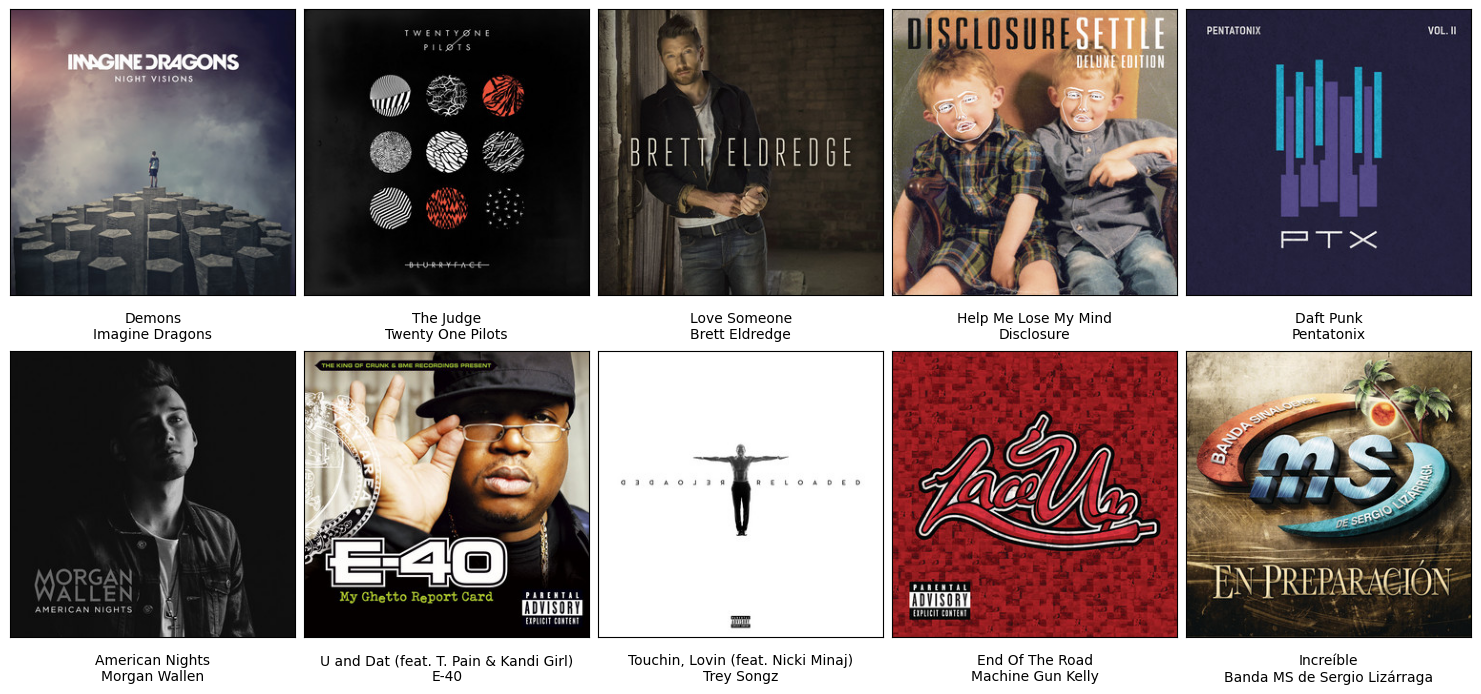

In [ ]:
visualize_songs(name,artist,url)

#Recomendador de Música Final

In [ ]:
def music_recommender(nome_musica):

  filtro = projection_m['song'] ==  nome_musica
  cluster = list(projection_m[filtro]['cluster_pca'])

  musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster[0]][[0, 1, 'song']]
  x_musica = list(projection_m[filtro][0])[0]
  y_musica = list(projection_m[filtro][1])[0]

  #Distancia entre os pontos

  distancias = euclidean_distances(musicas_recomendadas[[0,1]], [[x_musica,y_musica]])
  musicas_recomendadas['id'] = dados['id']
  musicas_recomendadas['distancias'] = distancias

  recomendada  = musicas_recomendadas.sort_values('distancias').head(10)

  #Buscando e Acessando os dados de cada música

  playlist_id = recomendada['id']

  url = []
  name = []
  artist = []
  for i in playlist_id:
     track = sp.track(i)
     url.append(track['album']['images'][1]['url'])
     name.append(track['name'])
     artist.append(track['album']['artists'][0]['name'])

  #Criando o plot com as músicas

  plt.figure(figsize = (15,10))
  columns = 5
  song_artist = []
  for i,j in enumerate(url):

    ax = plt.subplot(len(url) // columns + 1, columns, i + 1)

    image = io.imread(j)
    plt.imshow(image)

    ax.get_yaxis().set_visible(False)
    plt.xticks(color = 'w', fontsize = 0.1)
    plt.yticks(color = 'w', fontsize = 0.1)


    song_artist.append([name[i],artist[i]])
    plt.xlabel(song_artist[i][0] + "\n" + song_artist[i][1], fontsize = 10)

    plt.tight_layout(h_pad = 0.7, w_pad = 0)
    plt.subplots_adjust(wspace = None, hspace = None)
    plt.tick_params(bottom =  False)

  plt.show()


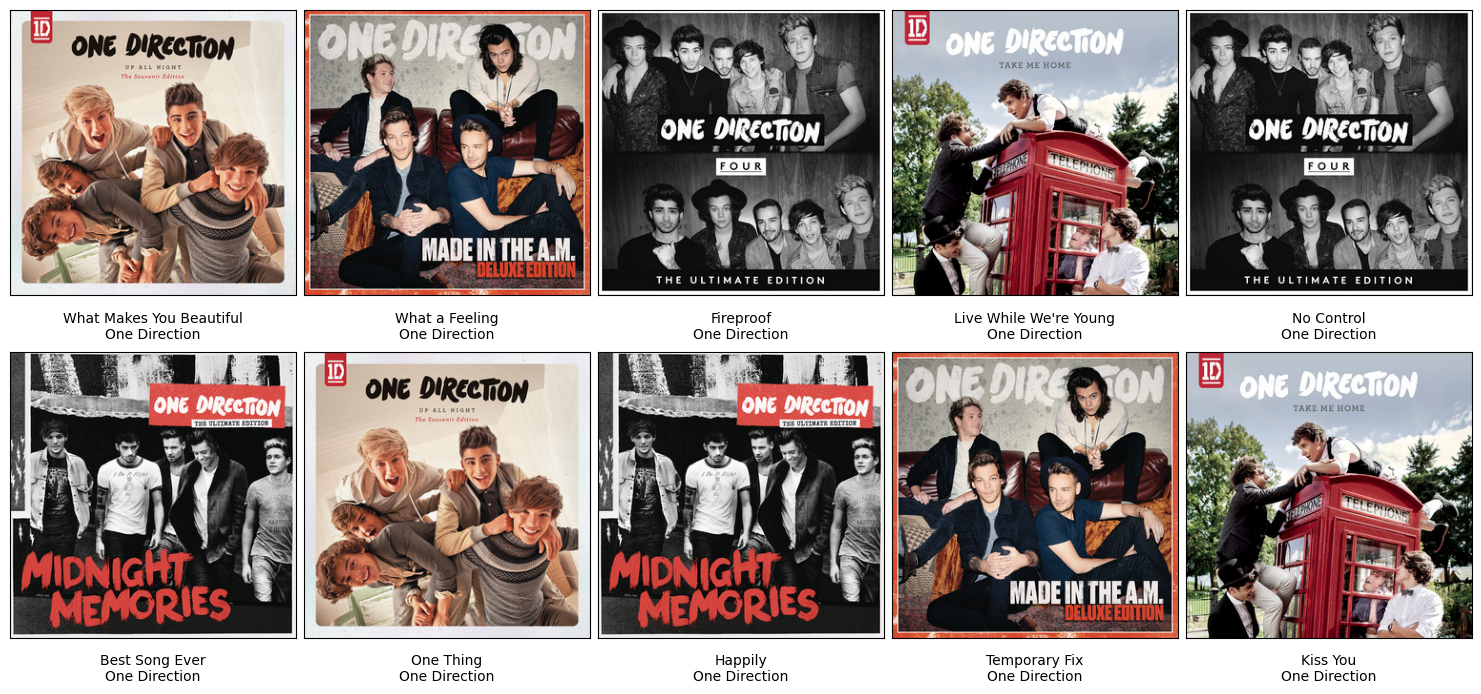

In [ ]:
music_recommender('One Direction - What Makes You Beautiful')

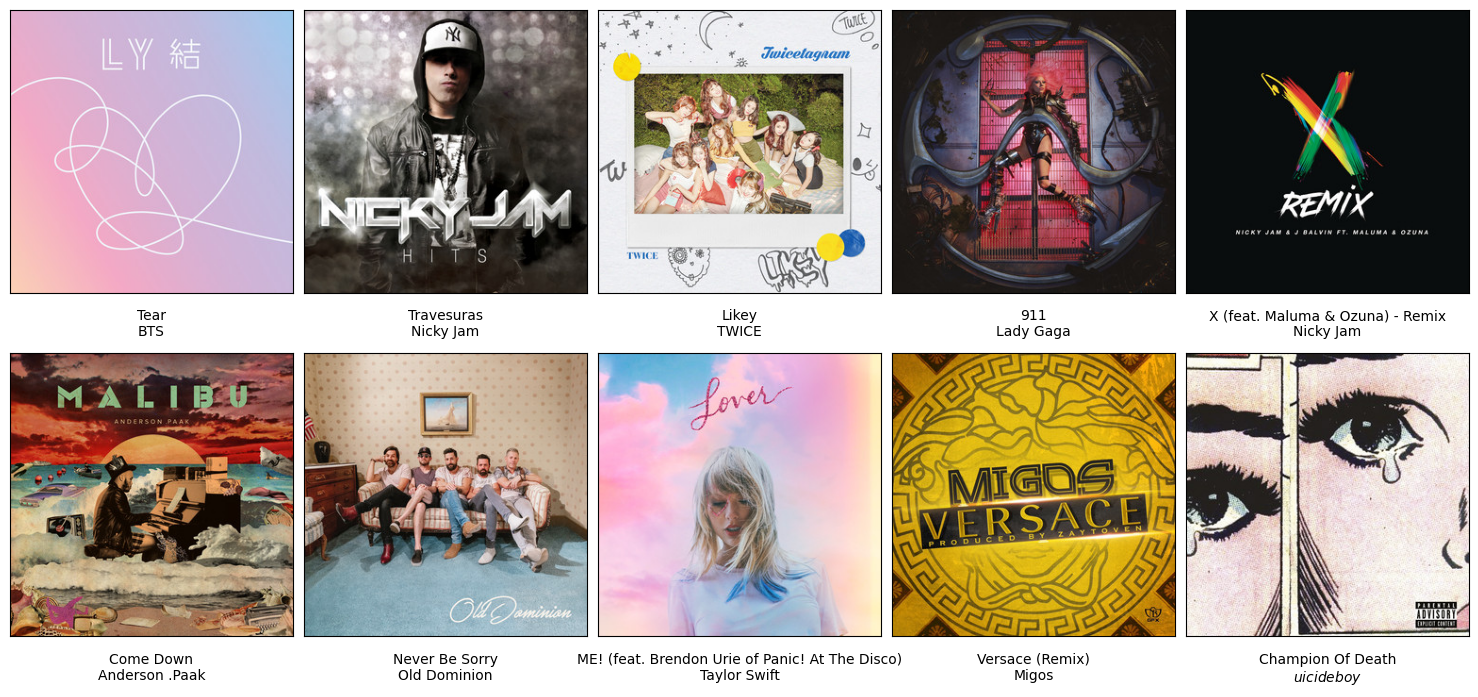

In [ ]:
music_recommender('BTS - Tear')